In [7]:
from model_evaluate import evaluate_model

SUPPORT VECTOR REGRESSION (LINEAR KERNEL) MODEL EVALUATION
--- SVR (LINEAR Kernel) - PV Production ---
MAE: 684.053
MSE: 1497454.962
RMSE: 1223.705
R²: 0.891
Adjusted R²: 0.891
Explained Variance: 0.891
Sample Size: 11664
Visualization Sample: 5,000 points


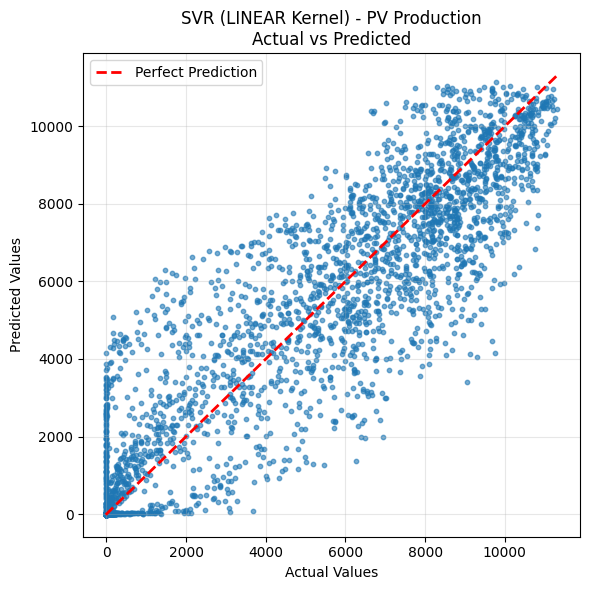

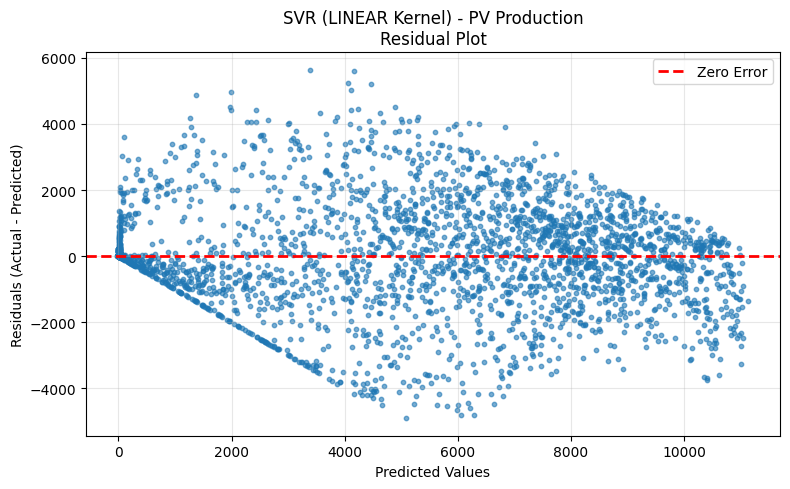

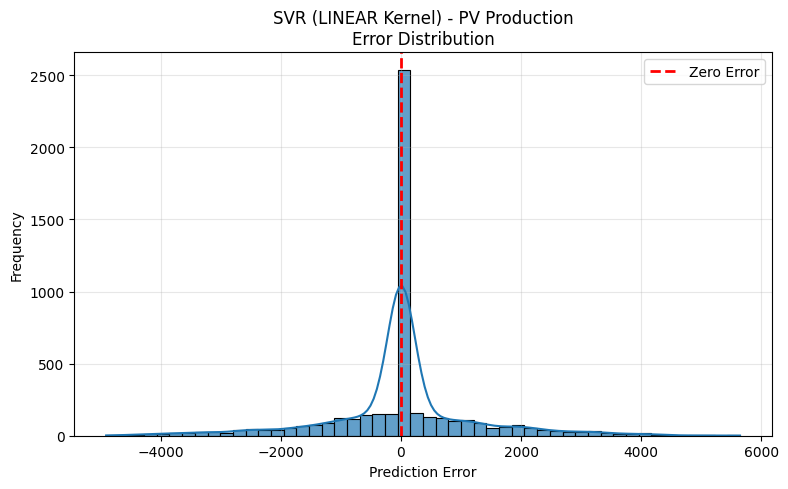

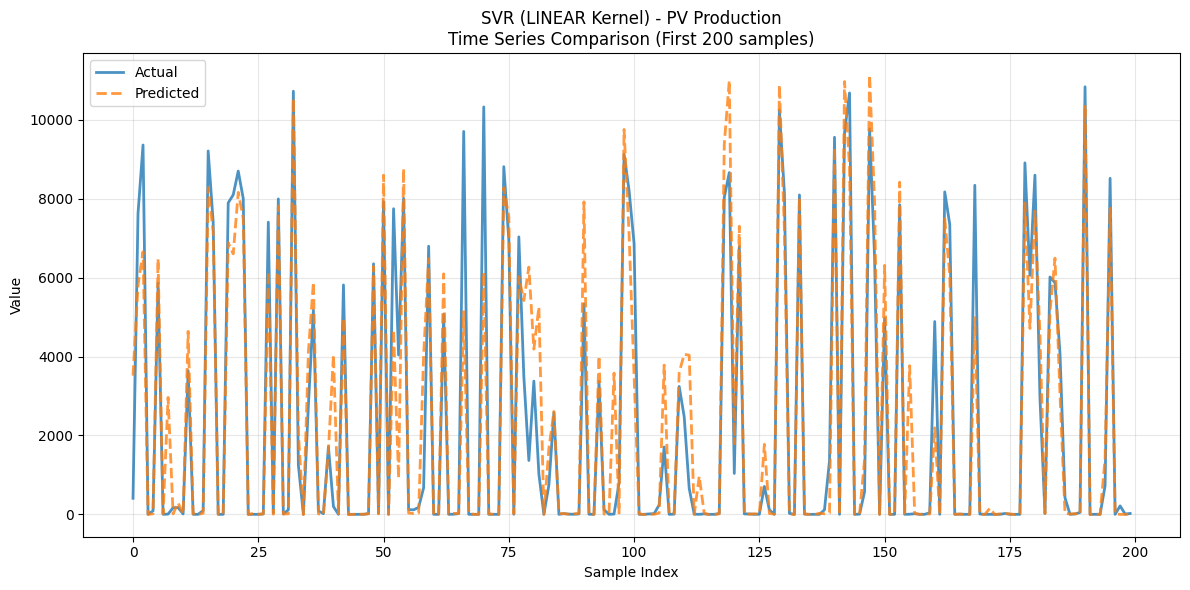

--- SVR (LINEAR Kernel) - Wind Production ---
MAE: 689.378
MSE: 735891.485
RMSE: 857.841
R²: 0.480
Adjusted R²: 0.479
Explained Variance: 0.480
Sample Size: 11664
Visualization Sample: 5,000 points


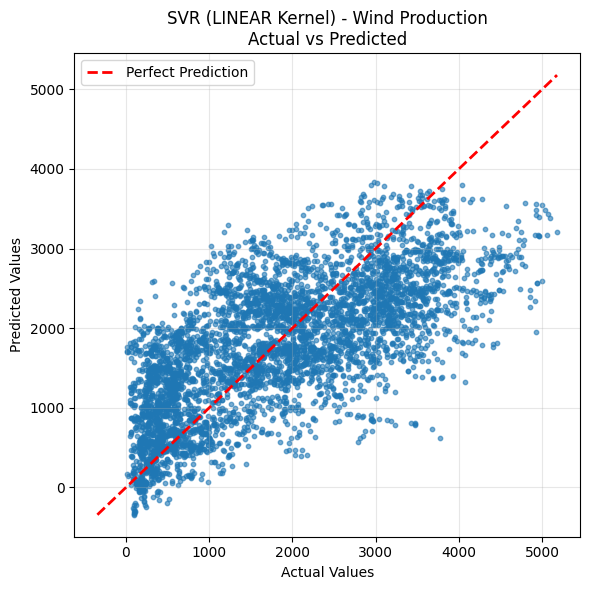

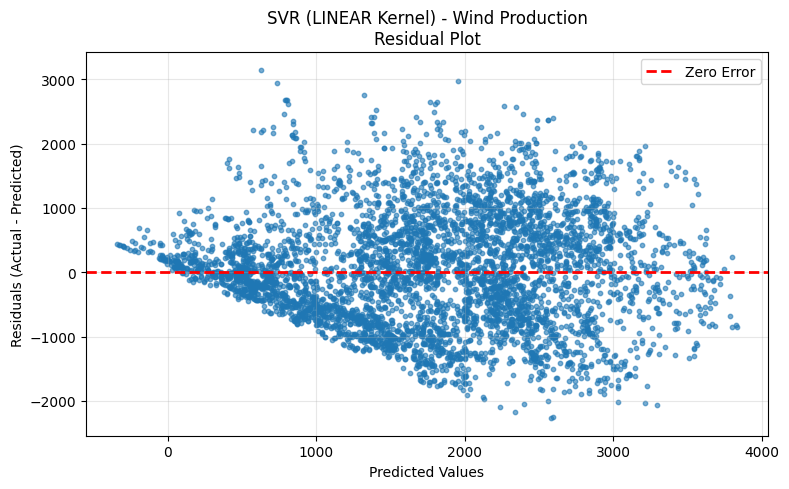

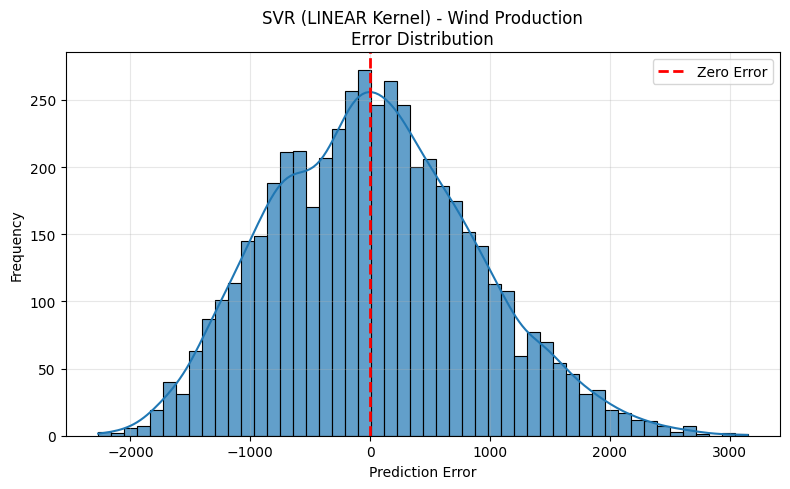

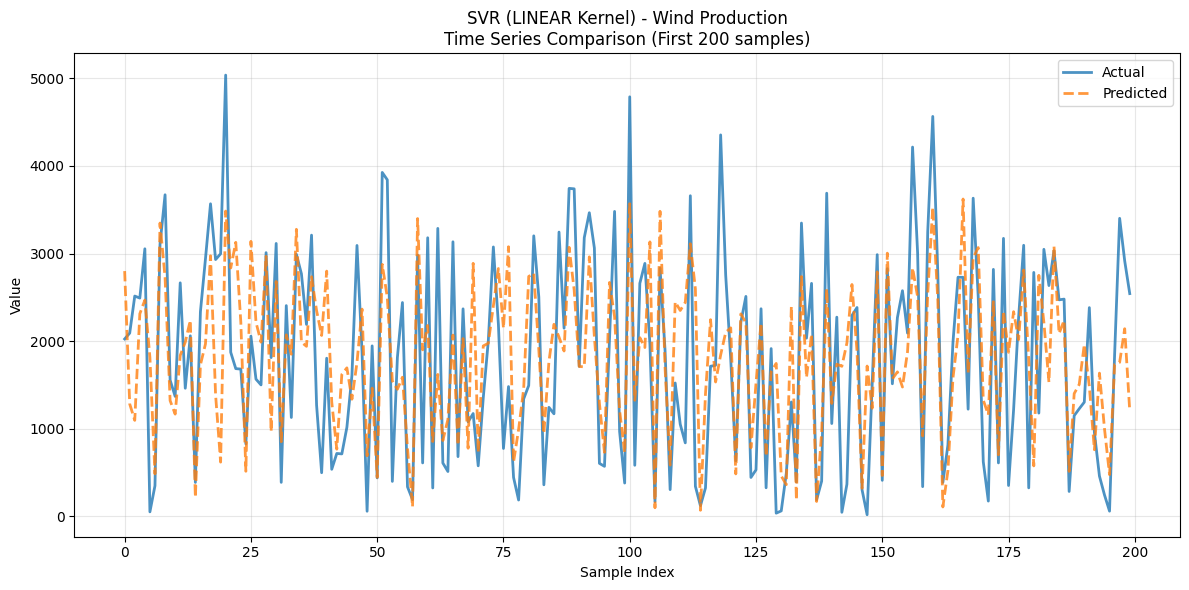



SUPPORT VECTOR REGRESSION (POLY KERNEL) MODEL EVALUATION
--- SVR (POLY Kernel) - PV Production ---
MAE: 1021.658
MSE: 2618274.083
RMSE: 1618.108
R²: 0.810
Adjusted R²: 0.810
Explained Variance: 0.822
Sample Size: 11664
Visualization Sample: 5,000 points


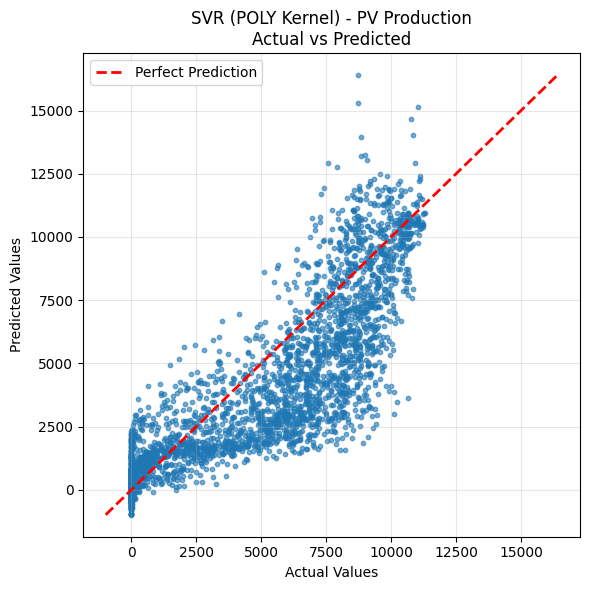

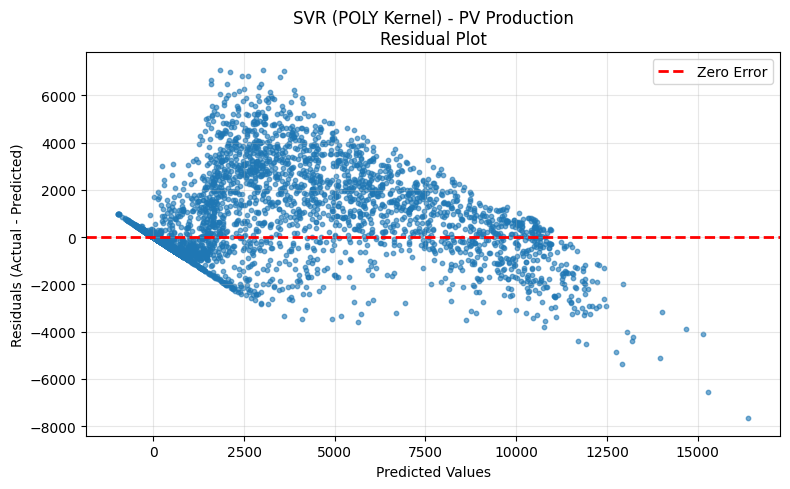

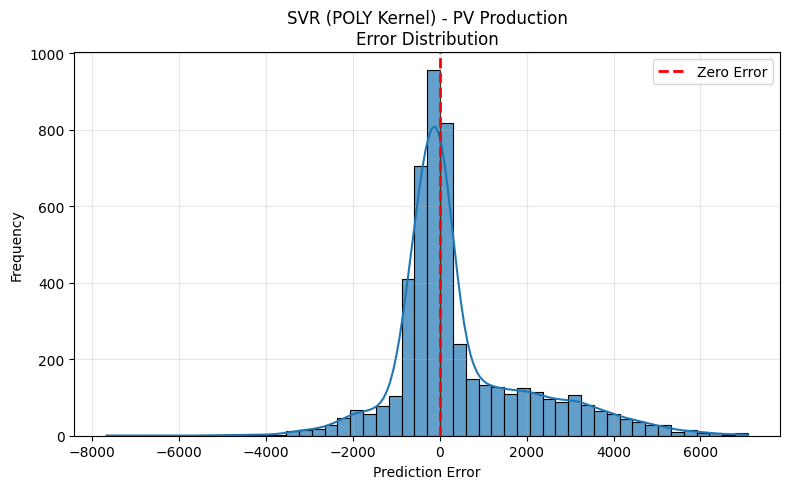

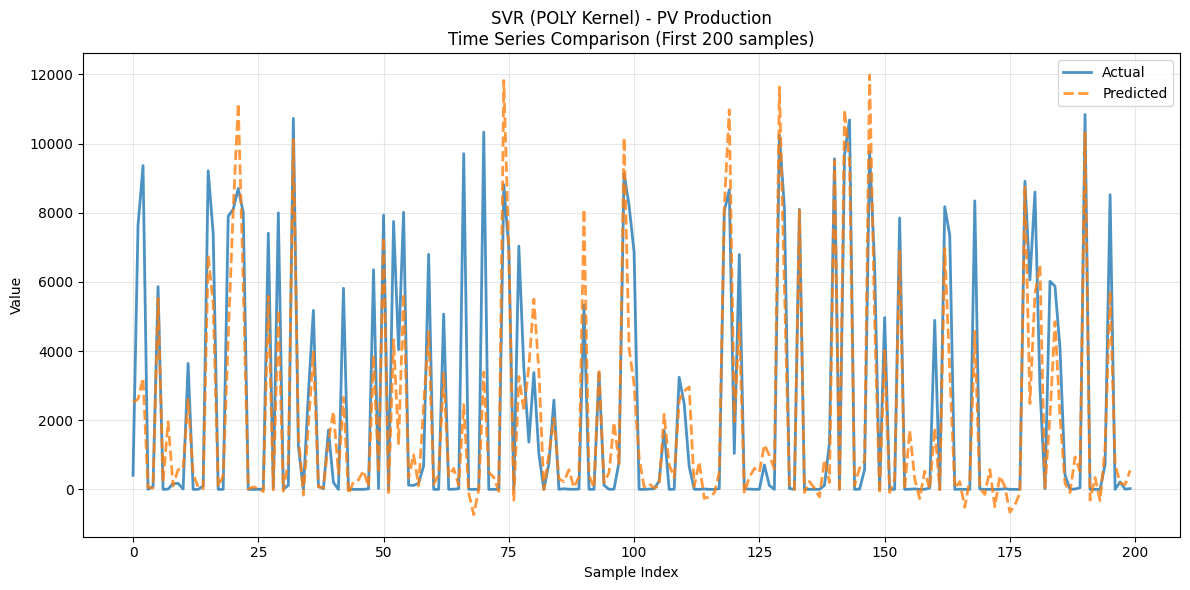

--- SVR (POLY Kernel) - Wind Production ---
MAE: 655.576
MSE: 683281.729
RMSE: 826.609
R²: 0.517
Adjusted R²: 0.516
Explained Variance: 0.520
Sample Size: 11664
Visualization Sample: 5,000 points


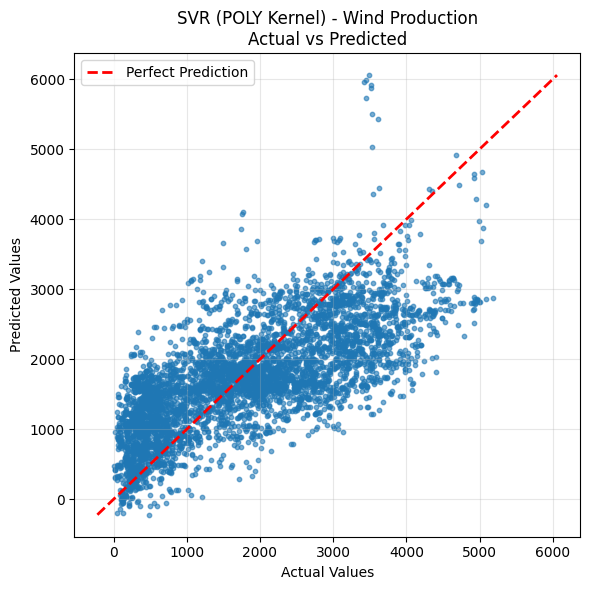

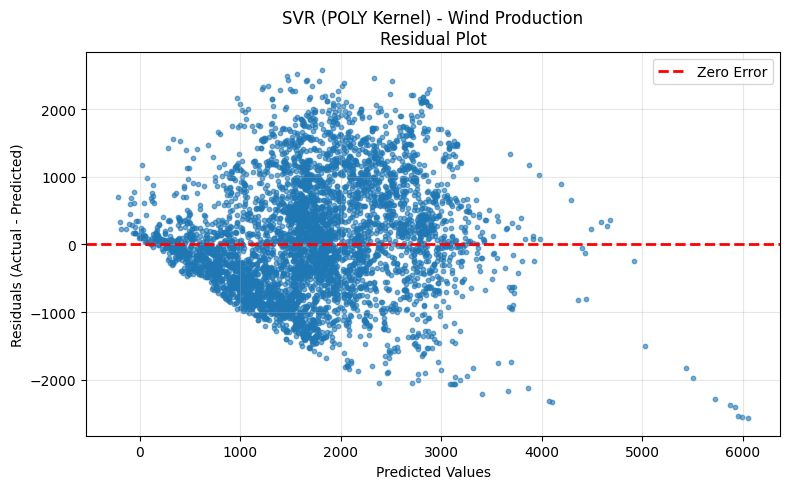

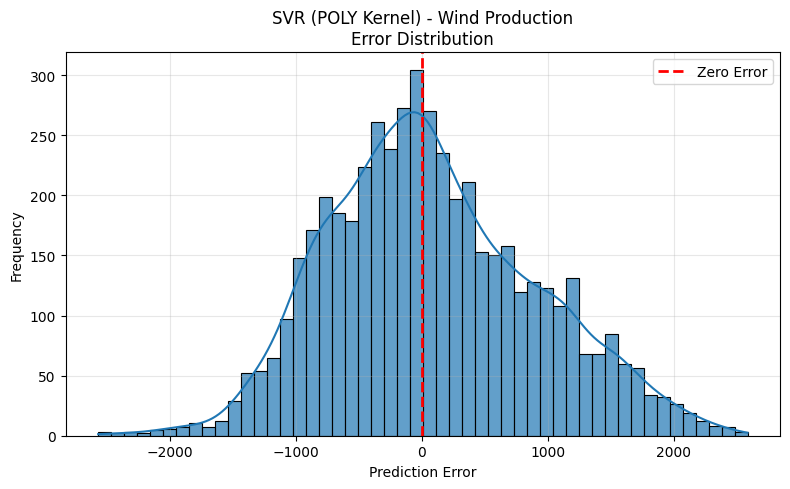

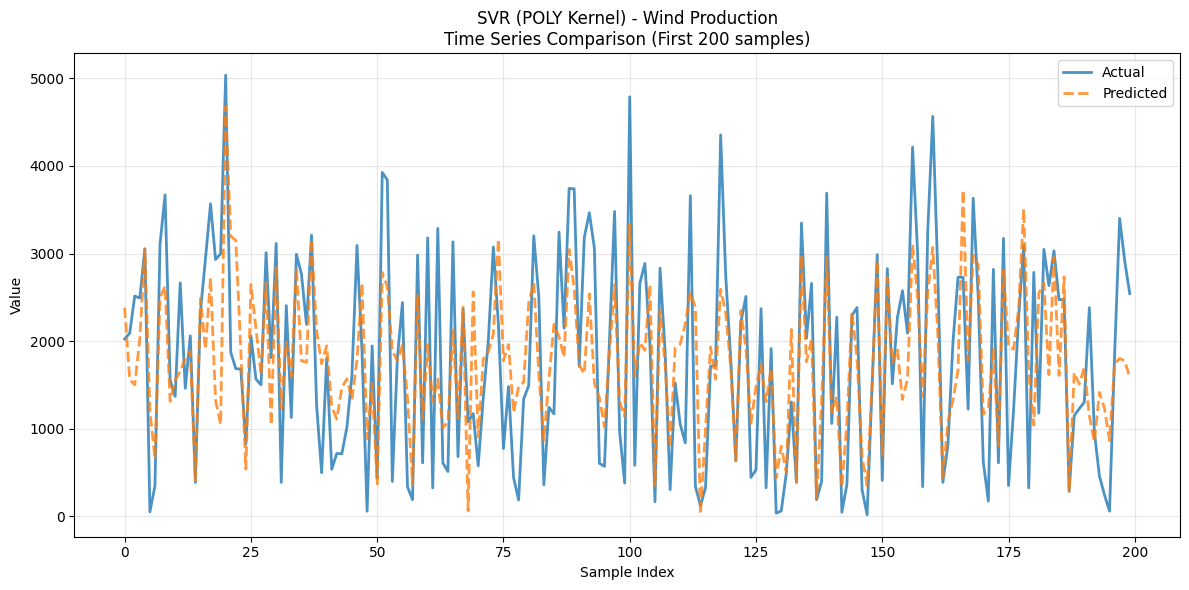



SUPPORT VECTOR REGRESSION (RBF KERNEL) MODEL EVALUATION
--- SVR (RBF Kernel) - PV Production ---
MAE: 652.037
MSE: 1228187.235
RMSE: 1108.236
R²: 0.911
Adjusted R²: 0.911
Explained Variance: 0.911
Sample Size: 11664
Visualization Sample: 5,000 points


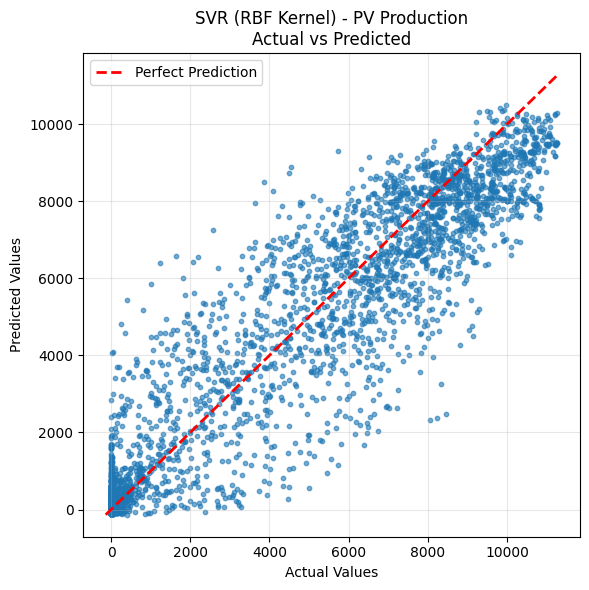

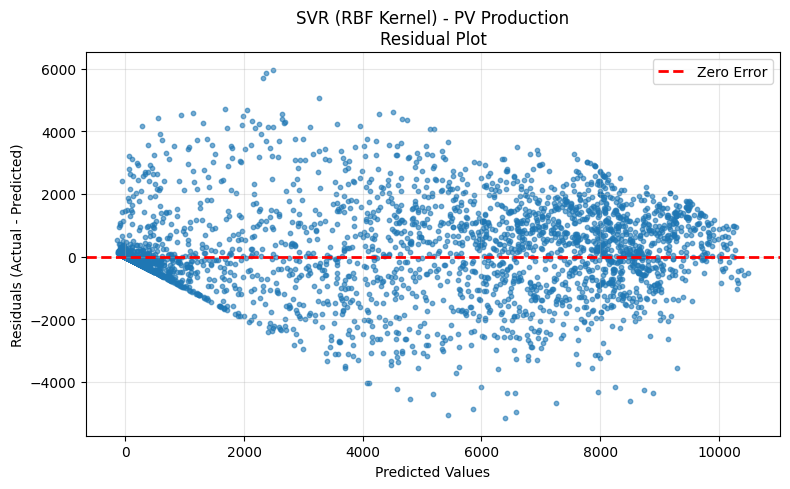

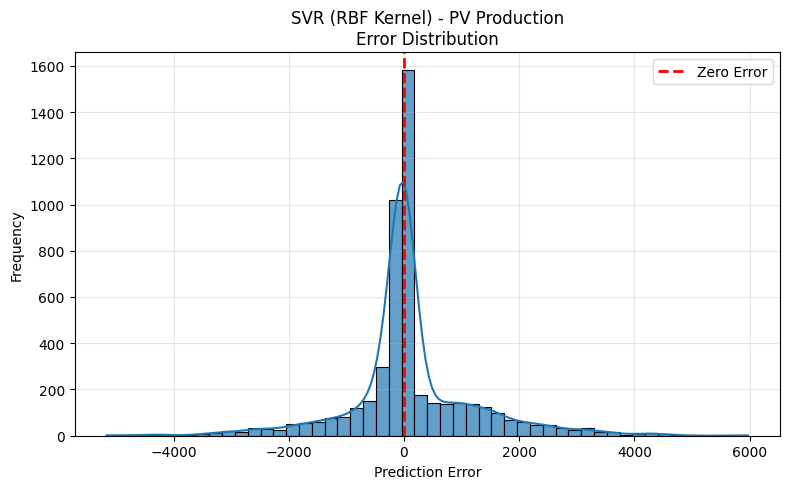

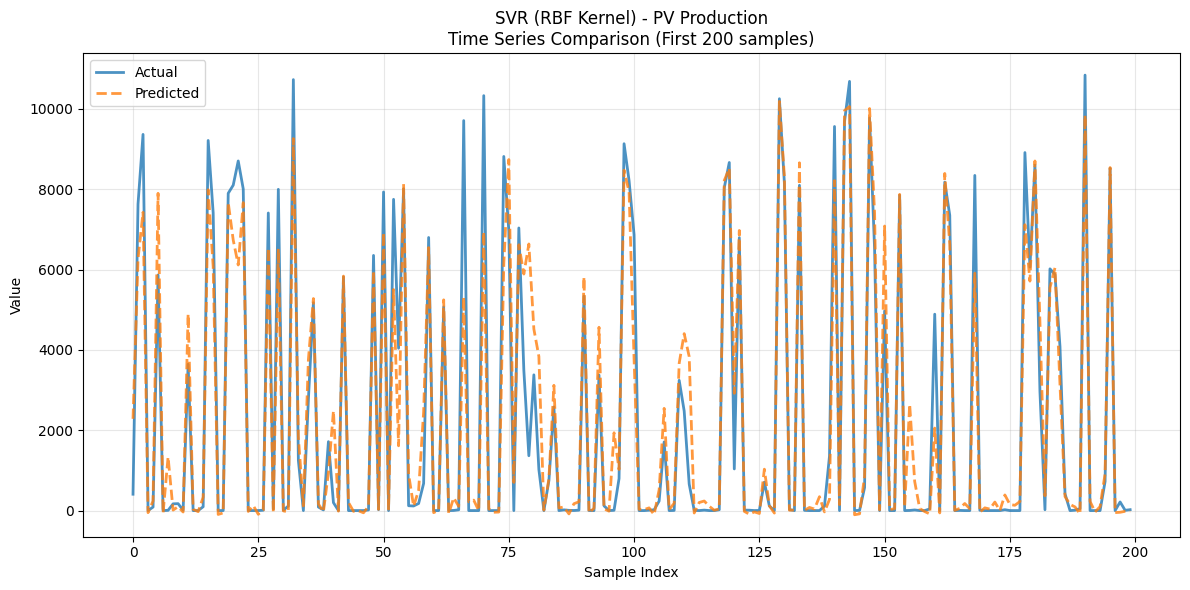

--- SVR (RBF Kernel) - Wind Production ---
MAE: 615.258
MSE: 631173.122
RMSE: 794.464
R²: 0.554
Adjusted R²: 0.553
Explained Variance: 0.555
Sample Size: 11664
Visualization Sample: 5,000 points


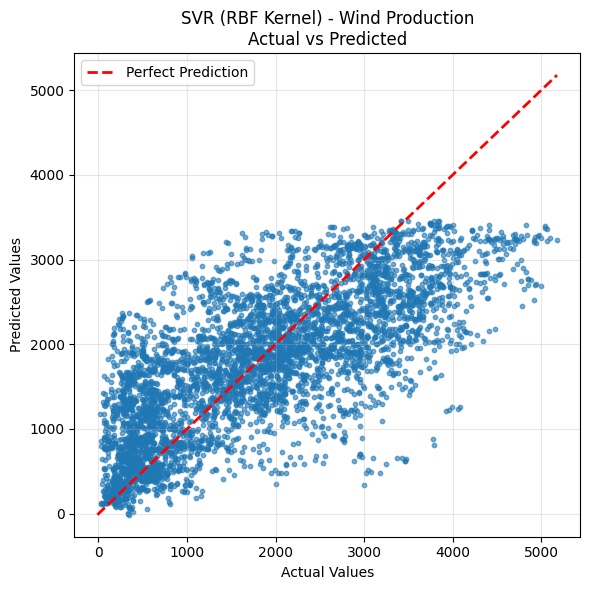

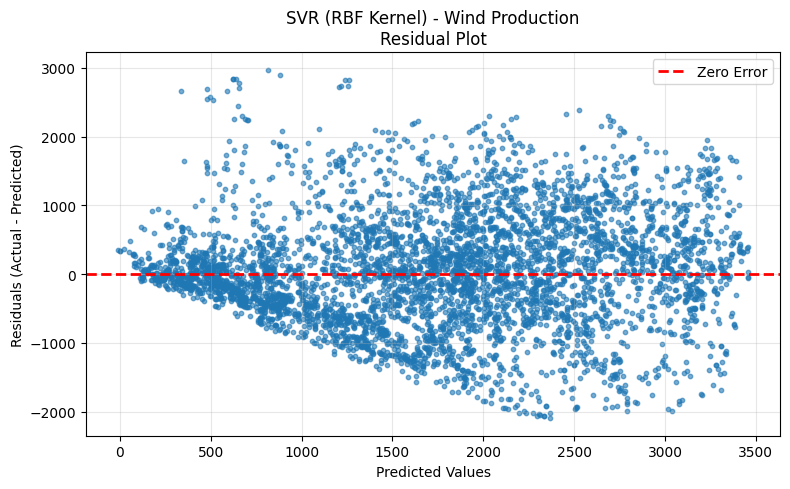

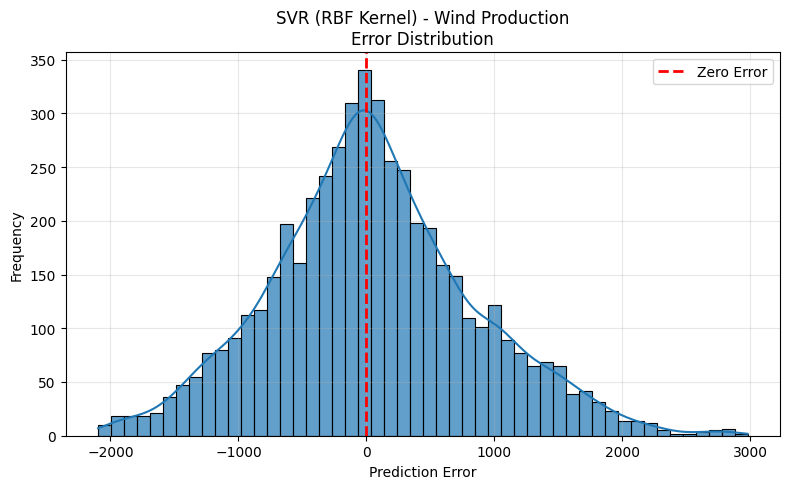

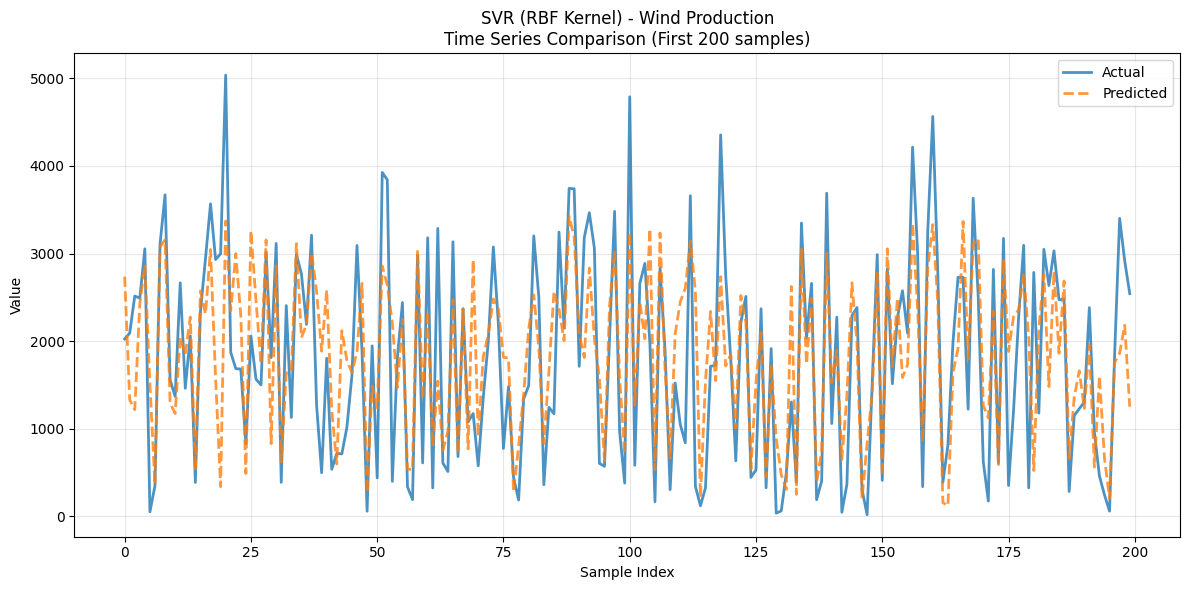



SUPPORT VECTOR REGRESSION (SIGMOID KERNEL) MODEL EVALUATION
--- SVR (SIGMOID Kernel) - PV Production ---
MAE: 2395.682
MSE: 16124991.328
RMSE: 4015.594
R²: -0.171
Adjusted R²: -0.171
Explained Variance: -0.153
Sample Size: 11664
Visualization Sample: 5,000 points


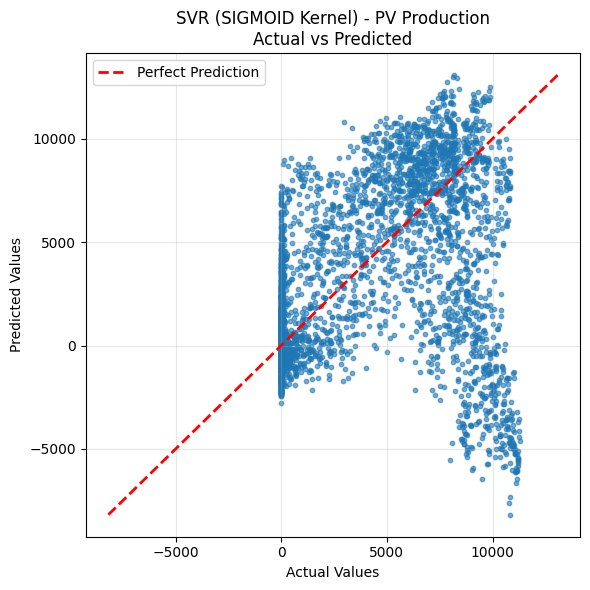

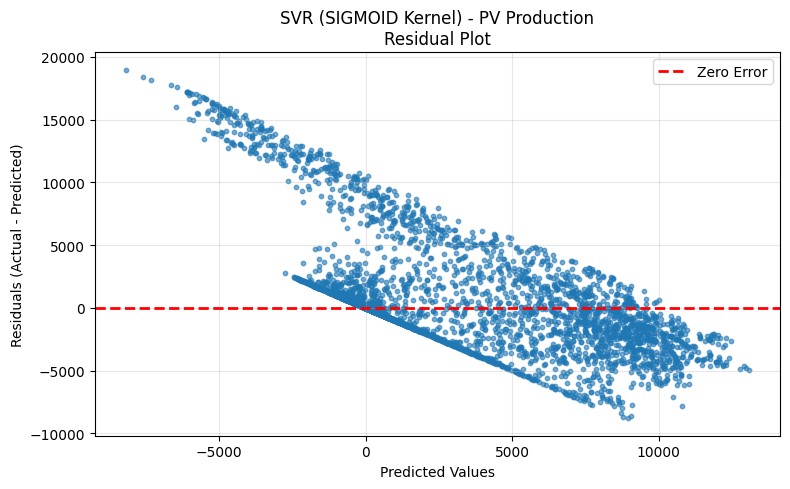

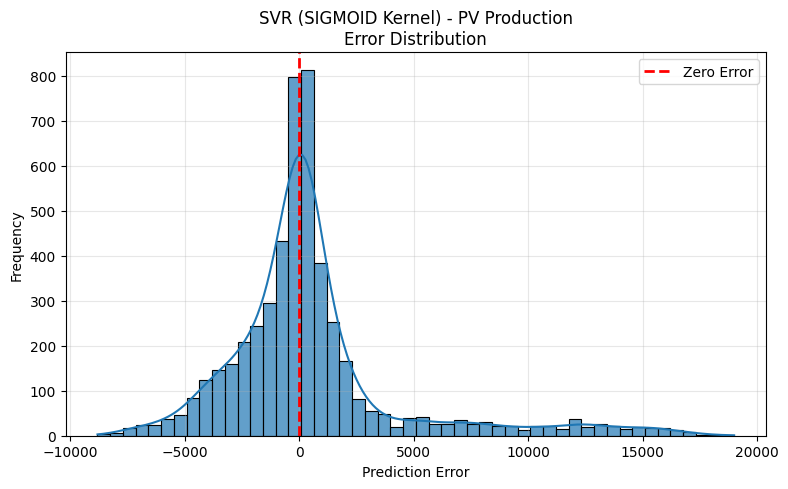

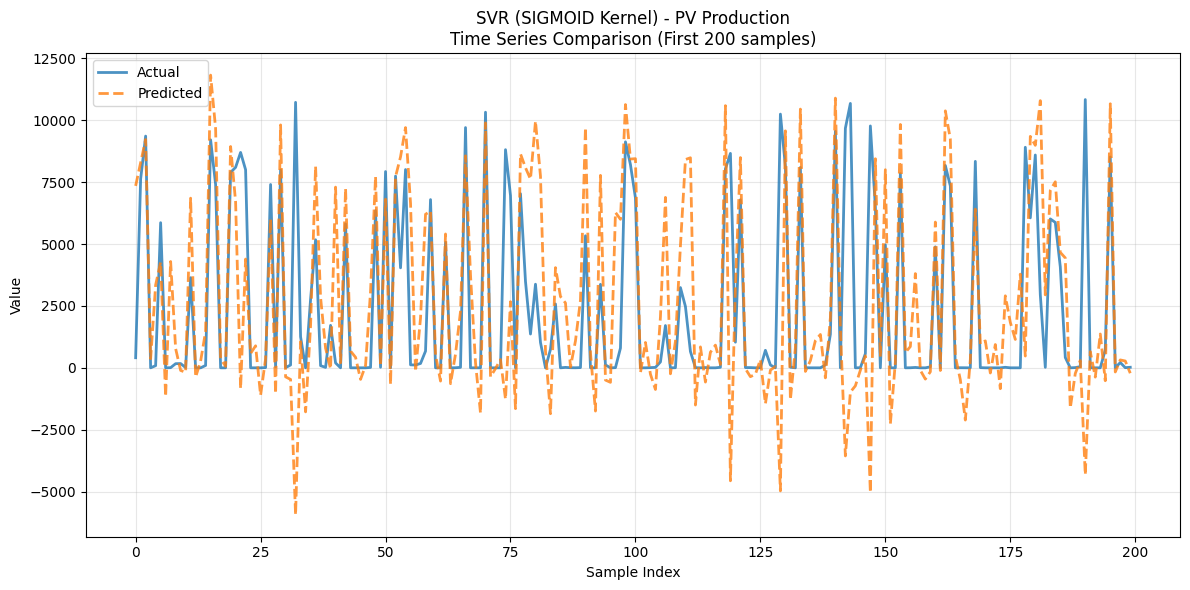

--- SVR (SIGMOID Kernel) - Wind Production ---
MAE: 2598.401
MSE: 18319600.995
RMSE: 4280.140
R²: -11.955
Adjusted R²: -11.964
Explained Variance: -11.551
Sample Size: 11664
Visualization Sample: 5,000 points


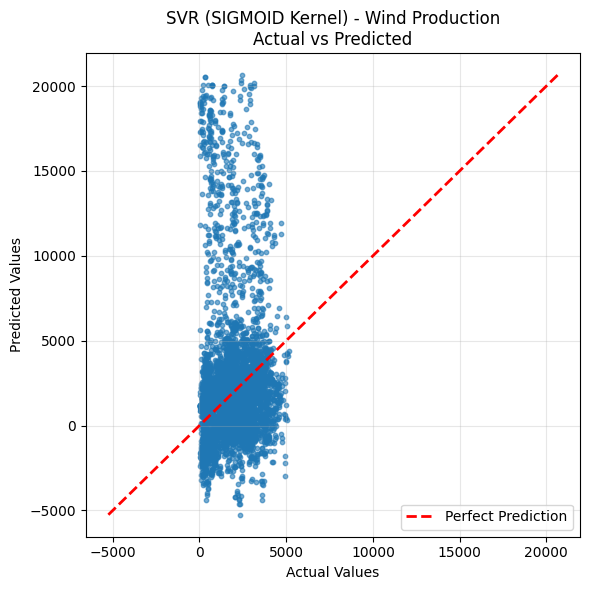

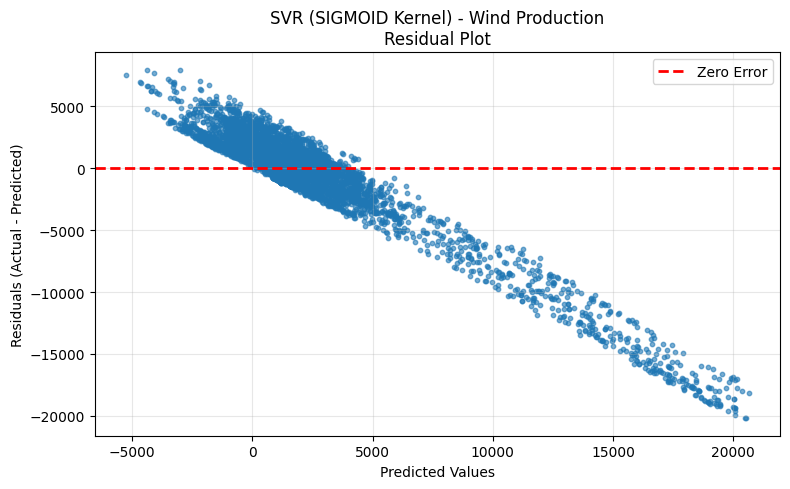

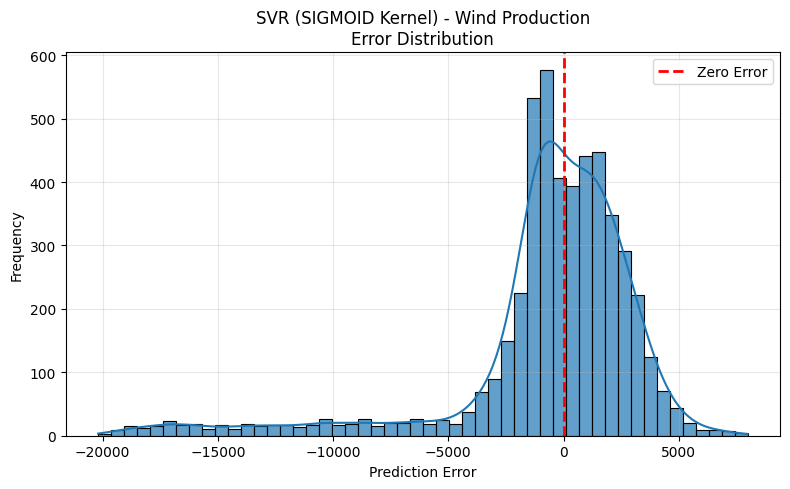

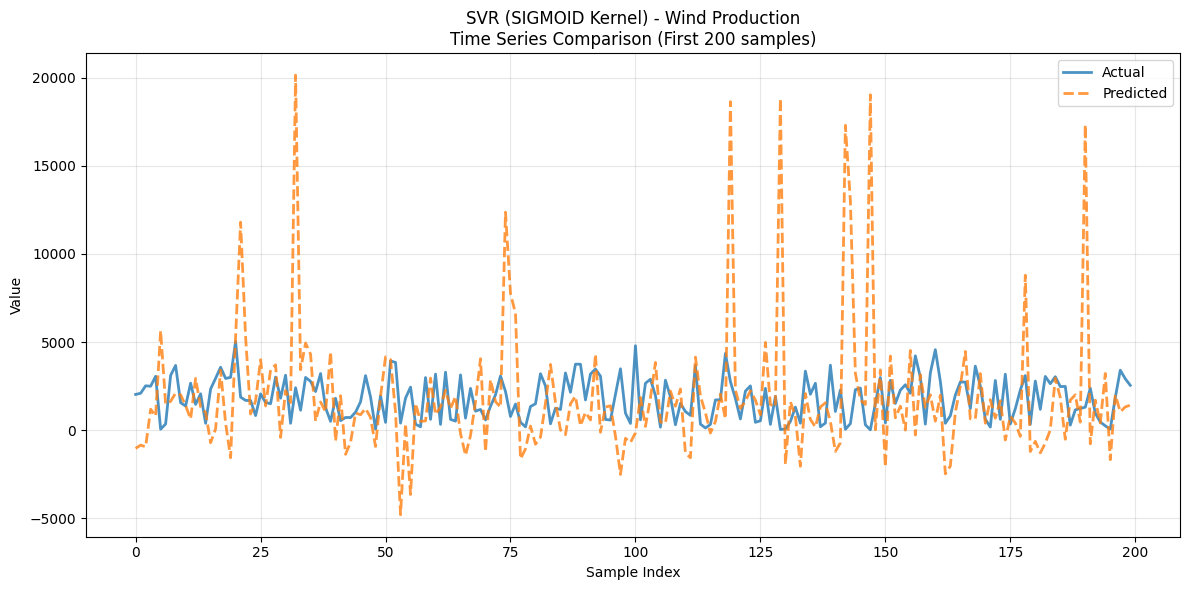

In [8]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
  

# Step 2: Load train and test data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features and targets
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 
                      'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 
                    'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']]

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define all kernels you want to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Step 6: Train and evaluate for each kernel
for kernel in kernels:
    print("="*80)
    print(f"SUPPORT VECTOR REGRESSION ({kernel.upper()} KERNEL) MODEL EVALUATION")
    print("="*80)

    # Initialize base SVR with chosen kernel
    svr_base = SVR(kernel=kernel, C=10, gamma='scale', epsilon=0.2)
    svr_model = MultiOutputRegressor(svr_base)
    svr_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = svr_model.predict(X_test_scaled)

    # PV Production Evaluation
    evaluate_model(
        y_true=y_test['PV_production'],
        y_pred=y_pred[:, 0],
        model_name=f"SVR ({kernel.upper()} Kernel)",
        target_name="PV Production",
        feature_names=X_train.columns
    )

    # Wind Production Evaluation
    evaluate_model(
        y_true=y_test['Wind_production'],
        y_pred=y_pred[:, 1],
        model_name=f"SVR ({kernel.upper()} Kernel)",
        target_name="Wind Production",
        feature_names=X_train.columns
    )

    print("\n")  # spacing between kernels
